In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd

In [2]:
def load_data():
    train = np.genfromtxt('train.csv', delimiter=',', skip_header=1)
    test  = np.genfromtxt('test_X.csv', delimiter=',', skip_header=1)
    return train, test

In [3]:
def plot_correlation_heatmap(X, y):
    feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=feature_names)
    df["y"] = y

    corr = df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Heatmap (Features & Target)")
    plt.show()

In [4]:
def plot_feature_scatter(X, y):
    num_features = X.shape[1]
    feature_names = [f"Feature_{i+1}" for i in range(num_features)]

    plt.figure(figsize=(12, 4 * num_features))

    for i in range(num_features):
        plt.subplot(num_features, 2, i + 1)

        plt.scatter(X[:, i], y, alpha=0.6)

        # Best-fit line
        m, c = np.polyfit(X[:, i], y, 1)
        x_line = np.linspace(X[:, i].min(), X[:, i].max(), 100)
        y_line = m * x_line + c
        plt.plot(x_line, y_line, color="red")

        plt.xlabel(feature_names[i])
        plt.ylabel("y")
        plt.title(f"{feature_names[i]} vs y")


    plt.tight_layout()
    plt.show()

In [5]:
if __name__=="__main__":
    train,test=load_data()
    lamda=np.logspace(-4,4,1000)
    X_train,y_train=train[:,0:train.shape[1]-1],train[:,train.shape[1]-1]






        

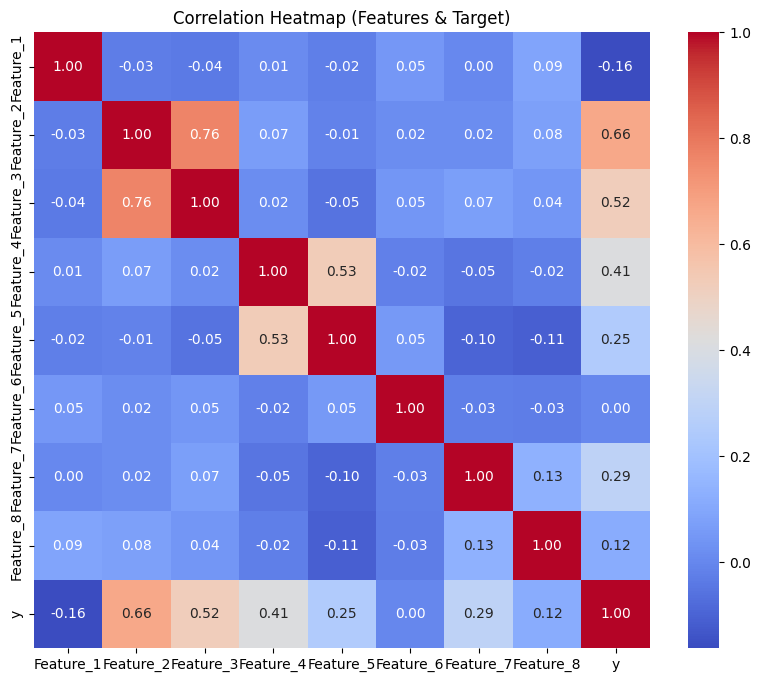

In [6]:
plot_correlation_heatmap(X_train,y_train)


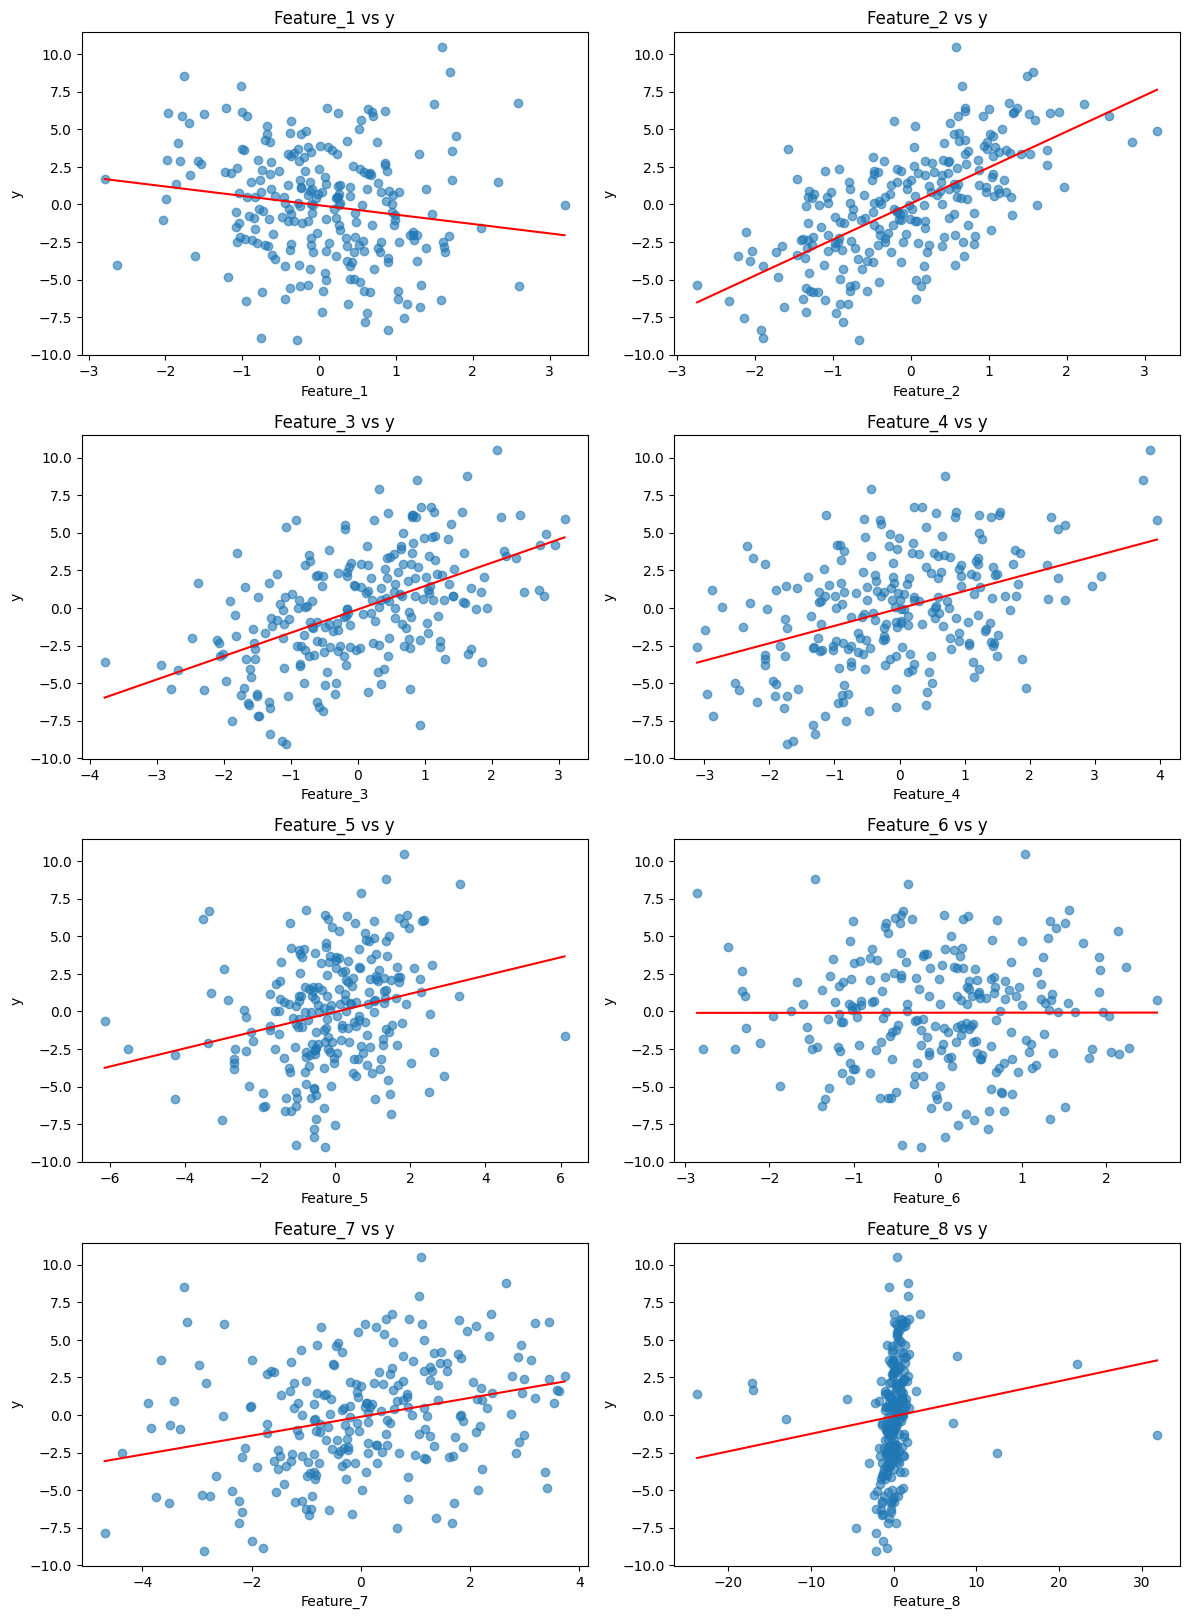

In [7]:
plot_feature_scatter(X_train,y_train)

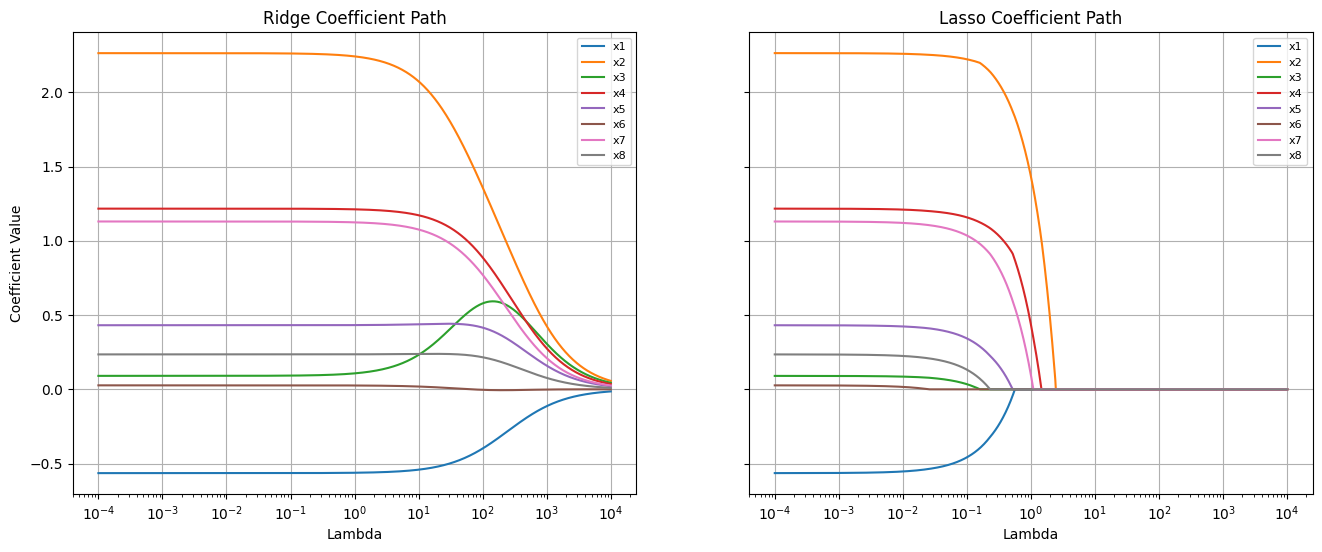

In [8]:
#training Ridge

ridge_coefficeints=[]
for t in lamda:
    p=Pipeline([
        ("scaler",StandardScaler()),
        ("model",Ridge(alpha=t))
    ])
    p.fit(X_train,y_train)
    ridge_coefficeints.append(p.named_steps["model"].coef_)
    
ridge_coefficeints=np.array(ridge_coefficeints)

#training lasso 
lasso_coefficeints=[]
for t in lamda:
    p=Pipeline([
        ("scaler",StandardScaler()),
        ("model",Lasso(alpha=t,max_iter=10000))
    ])
    p.fit(X_train,y_train)
    lasso_coefficeints.append(p.named_steps["model"].coef_)
    
lasso_coefficeints=np.array(lasso_coefficeints)
    
feature_names = [f"x{i+1}" for i in range(ridge_coefficeints.shape[1])]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Ridge
for i in range(ridge_coefficeints.shape[1]):
    axes[0].plot(lamda, ridge_coefficeints[:, i], label=feature_names[i])

axes[0].set_xscale("log")
axes[0].set_title("Ridge Coefficient Path")
axes[0].set_xlabel("Lambda")
axes[0].set_ylabel("Coefficient Value")
axes[0].legend(fontsize=8, loc="best")
axes[0].grid(True)

# Lasso
for i in range(lasso_coefficeints.shape[1]):
    axes[1].plot(lamda, lasso_coefficeints[:, i], label=feature_names[i])   

axes[1].set_xscale("log")
axes[1].set_title("Lasso Coefficient Path")
axes[1].set_xlabel("Lambda")
axes[1].legend(fontsize=8, loc="best")
axes[1].grid(True)

plt.show()

In [9]:
#task1
print("lasso coefficient of feature x6 turns 0 even at low values of lambda ~ 0.1")
print("By looking at scatter plot it can be seen that x6 is a noise")

lasso coefficient of feature x6 turns 0 even at low values of lambda ~ 0.1
By looking at scatter plot it can be seen that x6 is a noise


In [10]:
#task2
print("x2 and x3 looks like the features which converges when lambda increases")    

x2 and x3 looks like the features which converges when lambda increases


In [11]:
    
# x2 and x3 → column indices 1 and 2
corr = np.corrcoef(X_train[:, 1], X_train[:,2])[0, 1]  
print("Correlation coefficient between feature x2 and x3 is",corr)


Correlation coefficient between feature x2 and x3 is 0.7645550808406527


In [12]:
variances=np.var(X_train,axis=0)
feature_names=np.array(feature_names)
print(feature_names[np.argsort(-variances)])

['x8' 'x7' 'x5' 'x4' 'x3' 'x6' 'x2' 'x1']


sensor A looks like x5 and sensor B looks like x4
By plotting x4 against x5 it can be seen that the reading are around line y=x


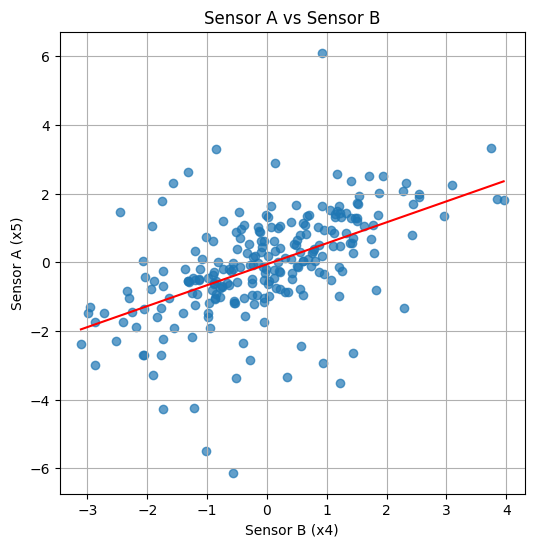

In [13]:
#task3
print("sensor A looks like x5 and sensor B looks like x4")
print("By plotting x4 against x5 it can be seen that the reading are around line y=x")
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 3], X_train[:, 4], alpha=0.7)
m, c = np.polyfit(X_train[:, 3], X_train[:, 4], 1)
x_line = np.linspace(X_train[:, 3].min(), X_train[:, 3].max(), 100)
y_line = m * x_line + c
plt.plot(x_line, y_line, color="red")
plt.xlabel("Sensor B (x4)")
plt.ylabel("Sensor A (x5)")
plt.title("Sensor A vs Sensor B")
plt.grid(True)
plt.show()


In [14]:
#task4
print("z looks like Feature 1.")
print("Its correlation with the other features is quite low.")
print("The coefficient of x1 maintains its magnitude in the Ridge model, but becomes zero earlier than some features in the Lasso model.")


z looks like Feature 1.
Its correlation with the other features is quite low.
The coefficient of x1 maintains its magnitude in the Ridge model, but becomes zero earlier than some features in the Lasso model.


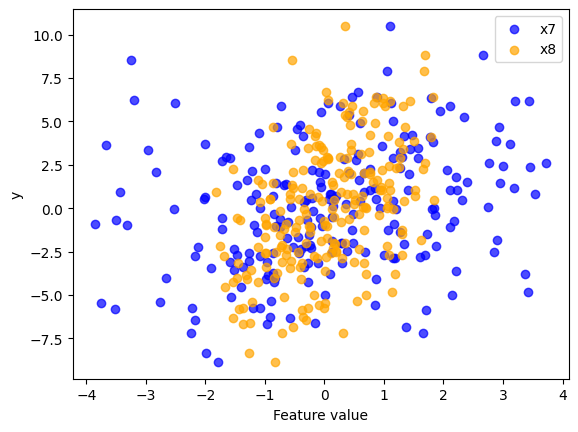

Here x8 outliers are removed
In LASSO model, coefficient of x8 turned to 0 pretty faster than x7 due to the major outliers in it.


In [15]:
# task5
inliners=abs(X_train[:,7])<2

X_train_inliners=X_train[inliners]
y_train_inliners=y_train[inliners]
plt.scatter(X_train_inliners[:, 6], y_train_inliners, alpha=0.7, label="x7", color="blue")
plt.scatter(X_train_inliners[:, 7], y_train_inliners, alpha=0.7, label="x8", color="orange")

plt.xlabel("Feature value")
plt.ylabel("y")
plt.legend()
plt.show()
print("Here x8 outliers are removed")
print("In LASSO model, coefficient of x8 turned to 0 pretty faster than x7 due to the major outliers in it.")




(240, 8)


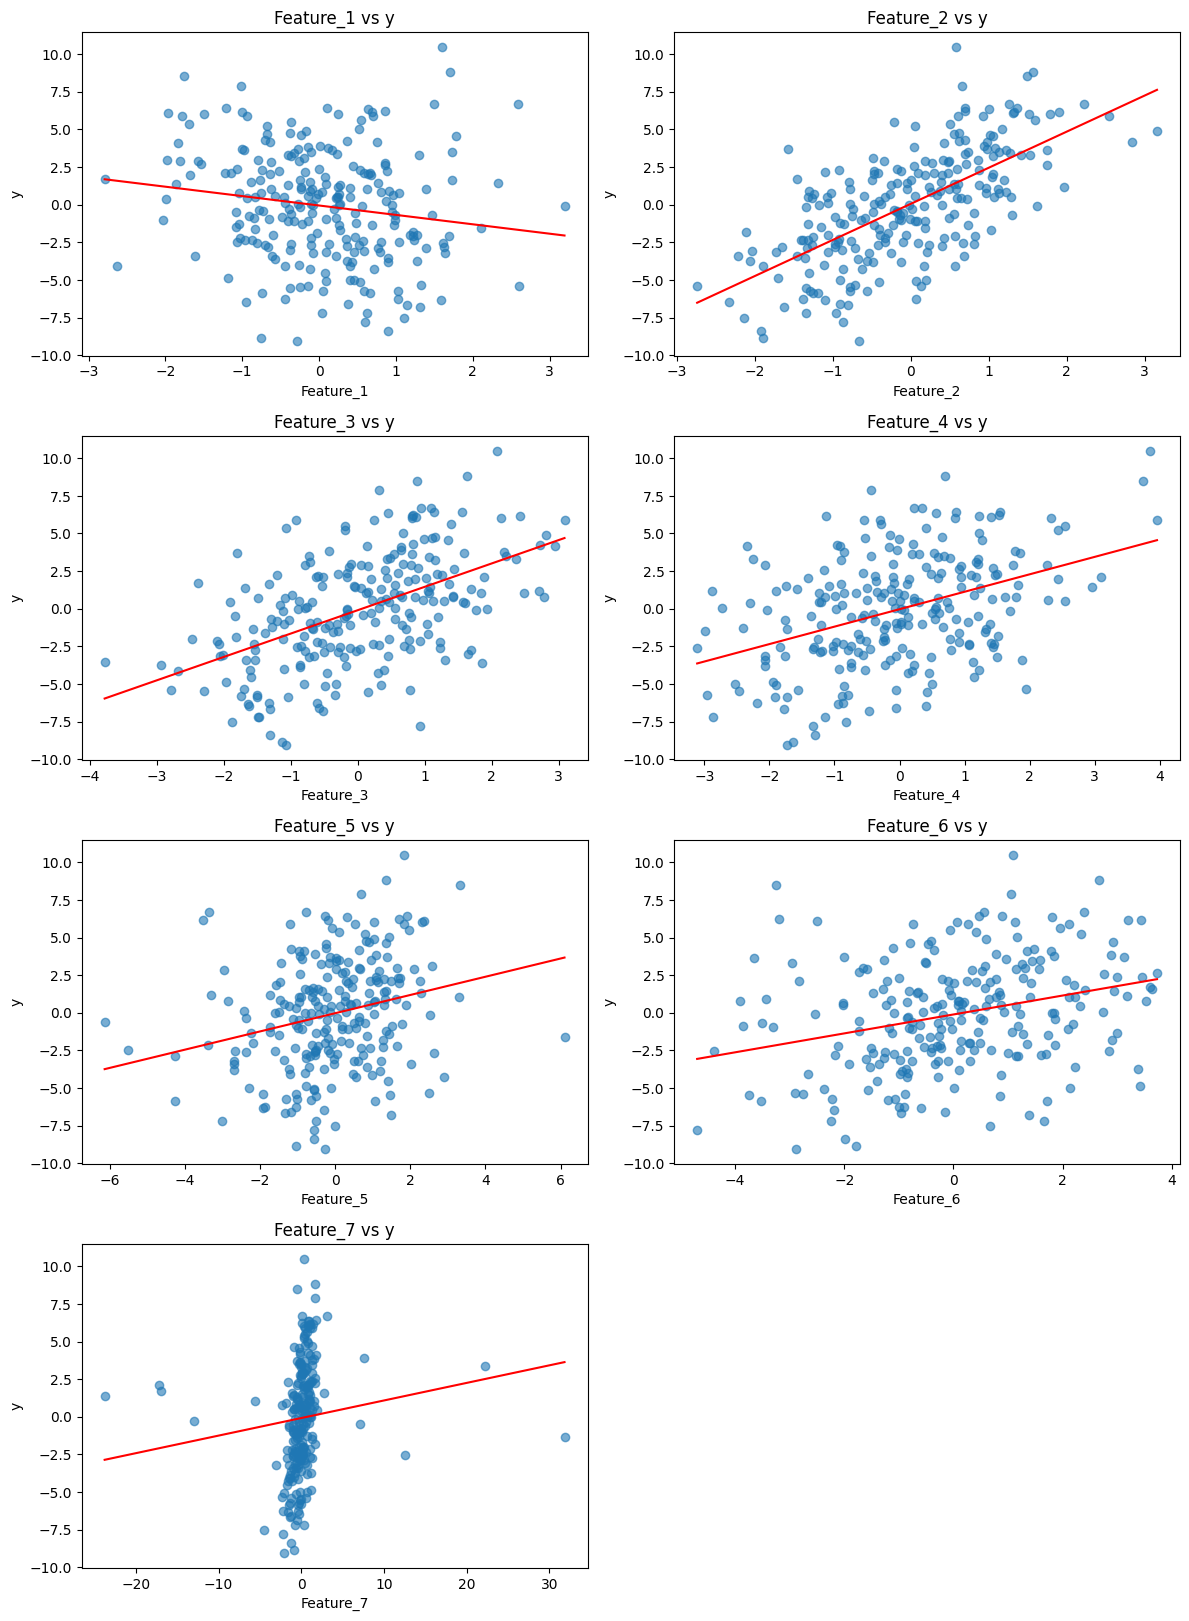

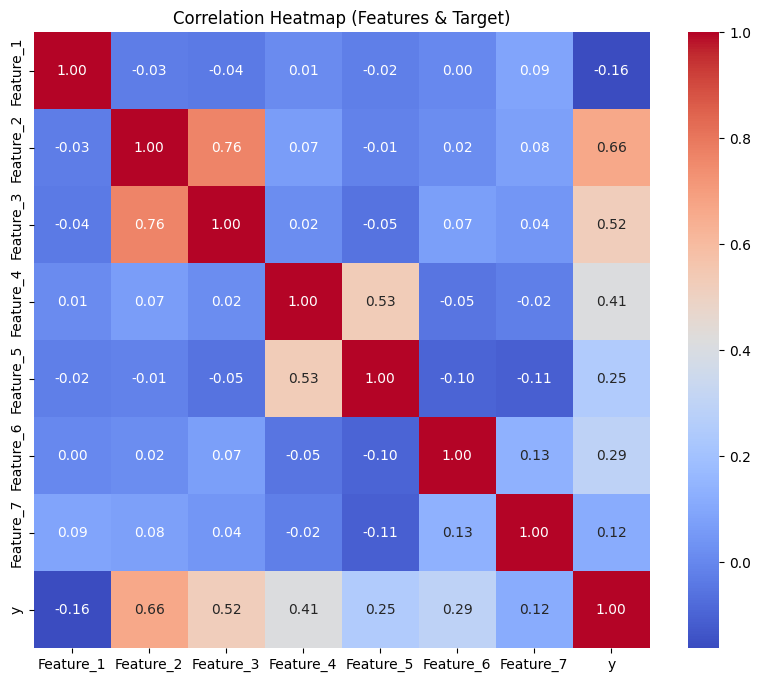

In [16]:
#removing 6th feature from training data set

print(X_train.shape)



X_train = np.delete(X_train,  5, axis=1)
plot_feature_scatter(X_train,y_train)
plot_correlation_heatmap(X_train,y_train)



In [17]:
#best_model

X_train[:,6]=np.clip(X_train[:,6],-2,2)

p=Pipeline([
    ("scaler",StandardScaler()),
    ("model",LassoCV(alphas=lamda,max_iter=10000))
])
p.fit(X_train,y_train)
best_alpha=p.named_steps["model"].alpha_
print(best_alpha)

X_test=test[:,0:test.shape[1]]
X_test[:, 7]  = np.clip(X_test[:, 7], -2, 2)
X_test = np.delete(X_test, 5 , axis=1)

print("mean squared error between y_train values and predicted through x_train:",mean_squared_error(y_train,p.predict(X_train)))

y_test=p.predict(X_test)
submission = pd.DataFrame({
    "y": y_test
    
})

submission.to_csv("24b1049_24b0937.csv", index=False)


0.0001
mean squared error between y_train values and predicted through x_train: 2.9342213192270483
